Import Libraries

In [126]:
library(ggplot2)
library(caTools)

Create Synthetic dataset

In [127]:
set.seed(123)
n <- 1000

In [128]:
#Generate predictors
property_value <- runif(n, 100000, 2000000)
distance_coast <- runif(n, 0, 50)
building_age <- sample(5:80, n, replace=TRUE)

In [129]:
#Create premium with realistic relationships and some noise
annual_premium <- 1500 +   #Assume annual base premium is $500
    (property_value * 0.001) +
    (distance_coast * -20) +
    (pmax(building_age - 20, 0) * 25) + 
    rnorm(n, 0, 300) # Add a little noise



In [130]:
insurance_data <- data.frame(property_value, distance_coast, building_age, annual_premium)

Running Linear Regression

In [131]:
linearReg <- insurance_data[c("property_value", "annual_premium")]

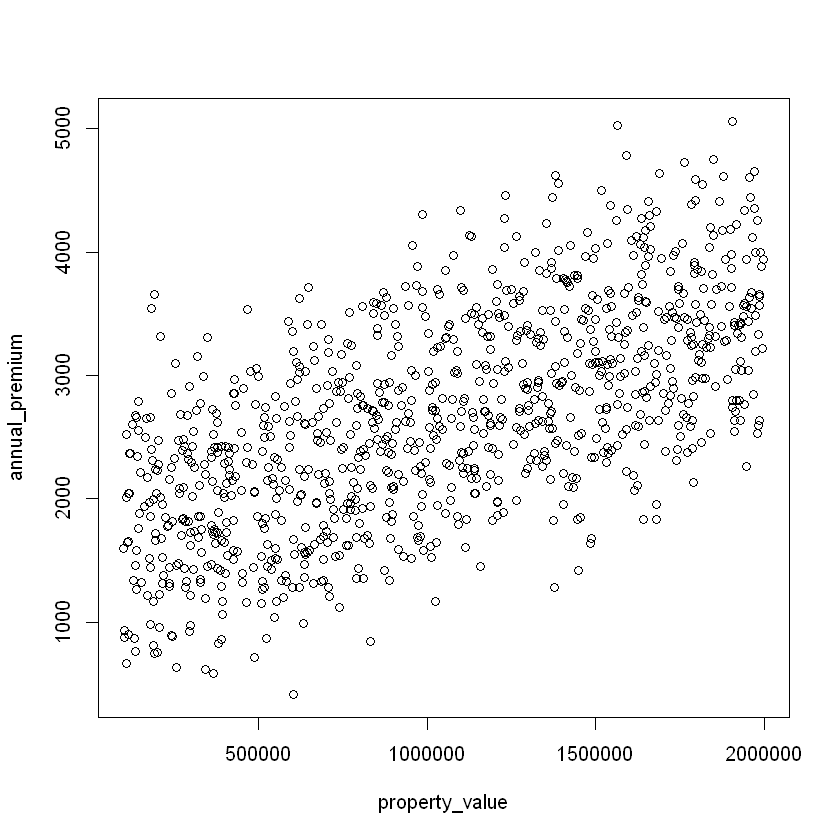

In [132]:
plot(linearReg)

In [133]:
#First, lets split our dataset between train and test
split <- sample.split(linearReg$annual_premium, SplitRatio = 0.7)
trainingset <- subset(linearReg, split == TRUE)
testset <- subset(linearReg, split == FALSE)

In [134]:
lm_r <- lm(formula = annual_premium ~ property_value, data=trainingset)

In [145]:
# Store for easy reference
intercept <- lm_r$coefficients[1]
property_coef <- lm_r$coefficients[2]

cat("Intercept:", round(intercept, 2), "\n")
cat("Property Value Coefficient:", round(property_coef, 4), "\n")
cat("Training R-squared:", round(summary(lm_r)$r.squared, 3), "\n")

Intercept: 1623.11 
Property Value Coefficient: 0.001 
Training R-squared: 0.402 


In [146]:
# Example calculations for your readers
property_500k <- 1623 + (0.000990 * 500000)
property_1m <- 1623 + (0.000990 * 1000000)

cat("$500,000 property premium:", round(property_500k, 2), "\n")
cat("$1,000,000 property premium:", round(property_1m, 2), "\n")
cat("Difference:", round(property_1m - property_500k, 2), "\n")

$500,000 property premium: 2118 
$1,000,000 property premium: 2613 
Difference: 495 


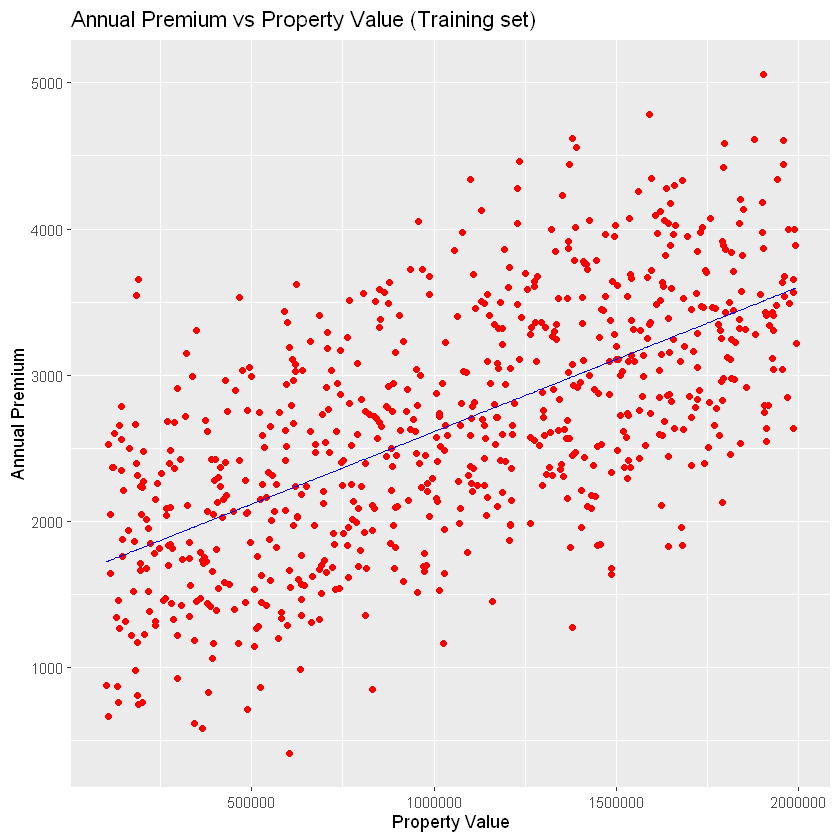

In [137]:
ggplot() + geom_point(aes(x = trainingset$property_value, y = trainingset$annual_premium), colour = 'red') +
  geom_line(aes(x = trainingset$property_value, y = predict(lm_r, newdata = trainingset)), colour = 'blue') +
  ggtitle('Annual Premium vs Property Value (Training set)') +
  xlab('Property Value') + ylab('Annual Premium')

In [138]:
# Test R-squared (using the manual calculation from before)
test_predictions <- predict(lm_r, newdata = testset)
test_ss_res <- sum((testset$annual_premium - test_predictions)^2)
test_ss_tot <- sum((testset$annual_premium - mean(testset$annual_premium))^2)
test_r_squared <- 1 - (test_ss_res / test_ss_tot)

# Compare them
cat("Training R-squared:", round(summary(lm_r)$r.squared, 3), "\n")
cat("Test R-squared:", round(test_r_squared, 3), "\n")

Training R-squared: 0.402 
Test R-squared: 0.423 


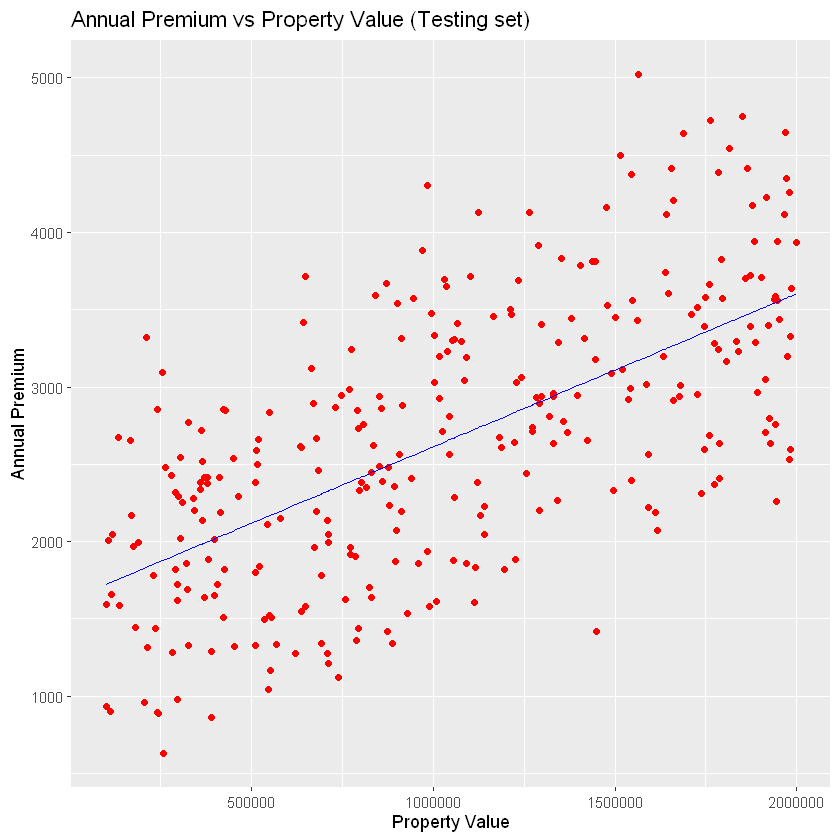

In [139]:
ggplot() + geom_point(aes(x = testset$property_value, y = testset$annual_premium), colour = 'red') +
  geom_line(aes(x = testset$property_value, y = predict(lm_r, newdata = testset)), colour = 'blue') +
  ggtitle('Annual Premium vs Property Value (Testing set)') +
  xlab('Property Value') + ylab('Annual Premium')

Multiple Linear Regression

In [140]:
#First, lets split our dataset between train and test
split <- sample.split(insurance_data$annual_premium, SplitRatio = 0.7)
trainingset <- subset(insurance_data, split == TRUE)
testset <- subset(insurance_data, split == FALSE)

In [141]:
mlm_r <- lm(formula = annual_premium ~ property_value + distance_coast + building_age, data=trainingset)

In [147]:
# Extract coefficients for interpretation
coefficients(mlm_r)

(Intercept) property_value distance_coast   building_age 
  1.104618e+03   1.015513e-03  -1.985333e+01   2.255131e+01

In [142]:
# Test R-squared (using the manual calculation from before)
test_predictions <- predict(mlm_r, newdata = testset)
test_ss_res <- sum((testset$annual_premium - test_predictions)^2)
test_ss_tot <- sum((testset$annual_premium - mean(testset$annual_premium))^2)
test_r_squared <- 1 - (test_ss_res / test_ss_tot)

# Compare them
cat("Training R-squared:", round(summary(mlm_r)$r.squared, 3), "\n")
cat("Test R-squared:", round(test_r_squared, 3), "\n")

Training R-squared: 0.863 
Test R-squared: 0.873 
